###### Investigate the Allele Frequencies in the segregants from the unisexual cross

#### Import needed modual

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import cryptofxns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.sandbox.stats.multicomp import multipletests as mltptest
## THE CONTROL OF THE FALSE DISCOVERY RATE IN MULTIPLE TESTING UNDER DEPENDENCY
## By Yoav Benjamini and Daniel Yekutieli
## The Annals of Statistics 2001, Vol. 29, No. 4, 1165–1188

#### Load needed genotype dataframe

In [3]:
#geno = pd.read_csv('../FILES/FiltGenotoHapFiltGeno2017-02-22.csv',index_col=0);
file_end = 'min-Geno-k6000.csv'
geno = pd.read_csv('../FILES/FiltGenotoHapFiltGeno-%s'%file_end)
chrlist = list(np.unique(geno.Chrom.tolist()));

#### Load variables: List of progeny from a x alpha cross, segregants for removal, chromosome lengths

In [4]:
segs_bi = np.concatenate(cryptofxns.axalp)
seg_out = cryptofxns.geno_remove;print seg_out
clens = cryptofxns.chromosome_lengths;
assert len(clens) == len(chrlist)

['SS-B377', 'SS-B385', 'SS-B410', 'SS-B411', 'SS-B560', 'SS-B395', 'SS-B594', 'SS-C273', 'SS-B879', 'SS-B885', 'SS-B593']


#### Take segregants from the unisexual cross

In [5]:
segs = [seg for seg in geno.columns.tolist()[4:] if seg not in seg_out]
segs_un = [seg for seg in segs if seg not in segs_bi];print len(segs_un)

55


## Take segregatns from the bisexual cross

In [6]:
segs_b = [seg for seg in segs_bi if seg not in seg_out];print len(segs_b)

39


#### Grab genotype dataframe for the segregants generated from the unisexual reproduction

In [7]:
genouni = geno[geno.columns.tolist()[:4]+segs_un].dropna(axis=0,how='any').reset_index(drop=True)

###### What are the dimensions of this dataframe?

In [8]:
genouni.shape

(86767, 59)

In [9]:
genouni.dropna(axis=1,how='any').shape

(86767, 59)

###### Check work

In [10]:
assert len(genouni[segs_un].T) == len(segs_un)

## Grab genotype dataframe ... bisexual reproduction 

In [11]:
len(segs_b)

39

In [12]:
geno

,Alt,Chrom,Pos,Ref,SS-B307,SS-B308,SS-B310,SS-B311,SS-B312,SS-B313,...,SS-C029_Correction,SS-C031_Correction,SS-C033,SS-C036,SS-C039,SS-C242,SS-C271,SS-C272,SS-C290,SS-C291
0,A,Chr01,5016.0,C,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,C,Chr01,5299.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,C,Chr01,5464.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,C,Chr01,6120.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,A,Chr01,6166.0,G,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,C,Chr01,6477.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
6,G,Chr01,6903.0,A,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
7,G,Chr01,7291.0,A,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
8,G,Chr01,7340.0,A,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
9,C,Chr01,7776.0,G,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [13]:
genobi = geno[geno.columns.tolist()[:4] + segs_b].dropna(axis=0,how='any').reset_index(drop=True)

In [14]:
genobi.shape

(86767, 43)

## Collapse 

In [15]:
genouni_blocks = cryptofxns.marker_blocks(genouni,chrlist)
genobi_blocks = cryptofxns.marker_blocks(genobi,chrlist)

In [16]:
con_genouni = cryptofxns.collapse_geno(genouni,genouni_blocks,chrlist)
con_genobi = cryptofxns.collapse_geno(genobi,genobi_blocks,chrlist)

In [17]:
print con_genouni.shape
print con_genobi.shape

(1426, 58)
(944, 42)


In [18]:
con_genouni.head()

,Chrom,v,w,SS-B307,SS-B308,SS-B310,SS-B311,SS-B312,SS-B313,SS-B314,...,SS-B588,SS-B589,SS-B591,SS-B598,SS-B599,SS-B600,SS-B605,SS-B606,SS-B611,SS-B621
0,Chr01,5016,35290,1,1,1,1,0,0,0,...,1,1,1,1,0,1,1,1,0,1
1,Chr01,35512,36618,1,1,1,1,0,0,0,...,1,1,1,1,0,1,1,1,0,1
2,Chr01,36769,36882,1,1,1,1,0,0,0,...,1,0,1,1,0,1,1,1,0,1
3,Chr01,37250,38476,1,1,1,1,0,0,1,...,1,0,1,1,0,1,1,1,0,1
4,Chr01,38724,39118,1,1,1,1,0,0,1,...,1,0,1,1,0,1,1,1,0,1


#### Calculate the allel frequencies

In [19]:
allele_freq_un = np.array(con_genouni[segs_un].sum(axis=1))/float(len(segs_un))#allele_freq = np.array(genouni[segs_un].sum(axis=1))/float(len(segs_un))

In [20]:
allele_freq_bi = np.array(con_genobi[segs_b].sum(axis=1))/float(len(segs_b))

#### Make a dataframe with the SNP chromosomal position and allel frequencies. 

In [21]:
uniadf = pd.DataFrame(columns=['Chrom','Pos','AF']);
biadf = pd.DataFrame(columns=['Chrom','Pos','AF']);

###### Assign values

In [22]:
uniadf['Chrom'] = con_genouni['Chrom'];
uniadf['Pos'] = [np.median([con_genouni['v'][i],con_genouni['w'][i]]) for i in con_genouni.index.tolist()];
uniadf['AF'] = allele_freq_un;
uniadf['v'] = con_genouni['v'];
uniadf['w'] = con_genouni['w']

In [23]:
biadf['Chrom'] = con_genobi['Chrom'];
biadf['Pos'] = [np.median([con_genobi['v'][i],con_genobi['w'][i]]) for i in con_genobi.index.tolist()];
biadf['AF'] = allele_freq_bi;
biadf['v'] = con_genobi['v'];
biadf['w'] = con_genobi['w'];

#### Display results

In [24]:
reload(cryptofxns);
cryptofxns.draw_QTLs(uniadf,'AF',chrlist,clens,ylabel='Allele Freq',mylines=[0.5],mk='o',lw=.5)

In [25]:
cryptofxns.draw_QTLs(biadf,'AF',chrlist,clens,ylabel='Allele Freq',mylines=[0.5],mk='o',lw=.5)

In [26]:
from itertools import cycle

draw_markers(biadf,'AF',chrlist,clens,ylabel='Allele Frequency',mylines=[0.154,0.5],myliness=['--','-'],
             mk='o',titlelabel='Allelic Frequencies\nsegregants from Bisexual cross',
             fprefix='../FIGS/Crypto-Genome-Wide-AF-Bi-Mar2017')

In [27]:
uni_seg_w_431a = con_genouni.ix[:,3:].sum(axis=1).tolist()
bi_seg_w_431a = con_genobi.ix[:,3:].sum(axis=1).tolist()

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [28]:
binom_test_p_un = [ss.binom_test(a,len(segs_un),1.0/2) for a in uni_seg_w_431a]

In [29]:
binom_test_p_bi = [ss.binom_test(a,len(segs_b),1.0/2) for a in bi_seg_w_431a]

In [30]:
len(binom_test_p_un)

1426

In [31]:
len(binom_test_p_bi)

944

In [32]:
len(biadf)

944

In [33]:
al = 0.05/2
q_val_bi_test_p_un = mltptest(binom_test_p_un,method='fdr_by',alpha=al)
q_val_bi_test_p_bi = mltptest(binom_test_p_bi,method='fdr_by',alpha=al)

In [34]:
reload(cryptofxns);

In [35]:
cryptofxns.matst-cryptofxns.mats

132621

In [36]:
def draw_markers(df, qvals, phenolabel, chrlist, clens, cent, ylabel = "$-\log_{10}\, p$",
              colors=cryptofxns.colors,titlelabel='Genome Wide Hotspots' ,alpha=0.9,
                 mk0 = '.',mk1='+', ls = ' ',mylines=[0.5],myliness=['-'],fprefix=None,lw=.5,MS=10,plotcent=False):
    clrcycle = cycle(colors)
    offset_dict = dict(zip(chrlist, cryptofxns.chrom_offset(clens)))
    combcoord = df.Pos + np.array([offset_dict[i] for i in df.Chrom.tolist()])
    fig, ax1 = plt.subplots(1,1,figsize=(10,4))
    for i, chrom in enumerate(chrlist):
        pos = df.ix[~(qvals) & (df.Chrom==chrom),'Pos'].values;
        sub = df.ix[~(qvals) & (df.Chrom==chrom),phenolabel].tolist();
        sig_pos = df.ix[(qvals) & (df.Chrom==chrom),'Pos'].values;
        sig_sub = df.ix[(qvals) & (df.Chrom==chrom),phenolabel].tolist();
        clr = clrcycle.next();
        ax1.plot(pos + offset_dict[chrom],sub,
                     marker = mk0, linestyle=ls, color=clr, alpha=alpha-.3)
        ax1.plot(sig_pos + offset_dict[chrom],sig_sub,
                     marker = mk1,markersize=MS, linestyle=ls, color=clr, alpha=alpha)
        if plotcent is True:
            ax1.bar(cent.ix[chrom].values[0]+offset_dict[chrom],1,(cent.ix[chrom].values[1]-cent.ix[chrom].values[0]),
                align='edge',alpha=.2,color='k')
            if chrom in ['Chr04']: ## plot mat locus
                ax1.bar(cryptofxns.mats+offset_dict[chrom],1,(cryptofxns.matst-cryptofxns.mats),
                   align='edge',alpha=.5,color='lightgreen')
    if mylines is not None:
        if myliness is not None:
            for l,they in enumerate(mylines):
                plt.hlines(they,-100000,sum(clens),#min(df.Pos),max(df.Pos+offset_dict[chrom]),
                           linestyle=myliness[l],linewidth=lw)
    chrom_midpts = 0.5 *  np.sum(np.array(zip([0]+list(np.cumsum(clens)),
                                      np.cumsum(clens))),axis=1)
    ax1.set_xticks(chrom_midpts)
    ax1.set_xticklabels([str(i) for i in range(1, len(clens)+1)])
    ax1.set_yticks([0.0,0.25,0.50,0.75,1.0])
    ax1.set_xlabel("Chromosomes",fontsize=18);
    ax1.set_ylabel(ylabel,fontsize=18);
    ax1.set_title(titlelabel, fontsize=18);
    ax1.spines['right'].set_visible(False);
    ax1.spines['top'].set_visible(False);
    plt.ylim(0,1);
    plt.xlim(-100000,sum(clens)+100000)
    plt.tight_layout();
    if fprefix is not None:
        fig.savefig(fprefix + '-{}.png'.format(phenolabel), dpi=900)

In [37]:
centros = cryptofxns.load_centrom_locs()

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


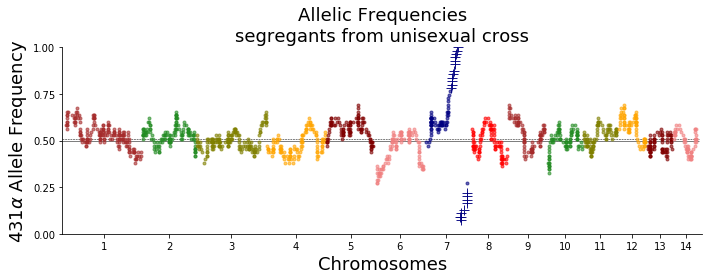

In [38]:
draw_markers(uniadf,q_val_bi_test_p_un[0],'AF',chrlist,clens,centros,ylabel=r'431$\alpha$ Allele Frequency',
            titlelabel='Allelic Frequencies\nsegregants from unisexual cross',
             myliness=['-','--'], mylines=[0.5,np.median(uniadf.AF.values)],
             fprefix='../FIGS/Crypto-08-Genome-Wide-AF-Uni-Jan2018')

In [39]:
np.median(biadf.AF.values)

0.46153846153846156

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


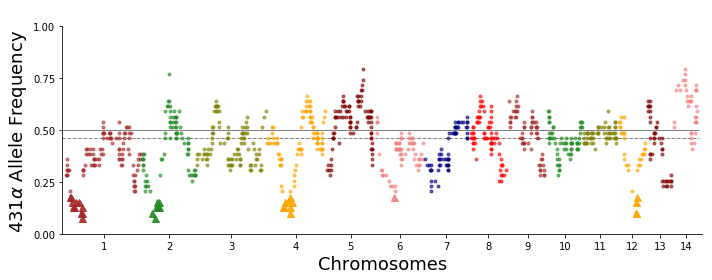

In [40]:
draw_markers(biadf,q_val_bi_test_p_bi[0],'AF',chrlist,clens,centros,ylabel=r'431$\alpha$ Allele Frequency',
            titlelabel=' ', myliness=['-','-.'], mylines=[0.5,np.median(biadf.AF.values)],
             fprefix='../FIGS/Crypto-08-Genome-Wide-AF-Bi-Median-Jan2018',mk1='^',MS=7)

In [39]:
bi_temp_qv = q_val_bi_test_p_bi[1][q_val_bi_test_p_bi[0]]

In [40]:
min(bi_temp_qv)

0.00012652554351788632

In [41]:
max(bi_temp_qv)

0.01589097629643042

In [42]:
516912-558358

-41446

In [43]:
548215 - 607926

-59711

In [44]:
sigbi_df = biadf.ix[q_val_bi_test_p_bi[0]]

In [45]:
sigbi_df.head()

,Chrom,Pos,AF,v,w
9,Chr01,138377.0,0.179487,135847,140907
11,Chr01,165208.0,0.179487,141048,189368
12,Chr01,195914.5,0.153846,189849,201980
13,Chr01,227402.5,0.128205,202496,252309
14,Chr01,257860.5,0.128205,252435,263286


In [47]:
for chrom in sigbi_df.Chrom.unique().tolist():
    temp = sigbi_df[(sigbi_df.Chrom==chrom)]
    print temp.w.tolist()[-1] - temp.v.tolist()[0],chrom

363851 Chr01
260351 Chr02
303144 Chr04
41446 Chr06
59711 Chr12


In [48]:
for chrom in sigbi_df.Chrom.unique().tolist():
    temp = sigbi_df[(sigbi_df.Chrom==chrom)]
    print chrom, temp.v.tolist()[0], temp.w.tolist()[-1] 

Chr01 135847 499698
Chr02 249040 509391
Chr04 509314 812458
Chr06 516912 558358
Chr12 548215 607926


In [ ]:
biadf[(q_val_bi_test_p_bi[0])&(biadf.Chrom=='Chr06')]

In [ ]:
len(biadf)

In [ ]:
len(uniadf)

In [ ]:
int(biadf[(q_val_bi_test_p_bi[0])
      &(biadf.Chrom=='Chr06')].w - biadf[(q_val_bi_test_p_bi[0])
                                                                   &(biadf.Chrom=='Chr06')].v)

In [ ]:
np.max(q_val_bi_test_p_bi[1][q_val_bi_test_p_bi[0]])

In [ ]:
?mltptest

In [ ]:
results_bi = [ss.binom_test(a,len(segs_b),1.0/2) for a in np.arange(0,len(segs_b)+1)]

In [ ]:
plt.plot(np.arange(0,len(segs_b)+1),-np.log10(results_bi),'.');
plt.hlines(-np.log10(0.05/ con_genobi.shape[0]),xmin=-1,xmax=40)

In [ ]:
-np.log10(results_bi[-8])

In [ ]:
-np.log10(results_bi[7])

In [ ]:
33/float(len(segs_bi))

In [ ]:
uniadf['binom'] = -np.log10(np.array(binom_test_p_un))
biadf['binom'] = -np.log10(np.array(binom_test_p_bi))

In [ ]:
print -np.log10(0.05) ## 0.05 alpha cutoff

In [ ]:
print -np.log10(0.05/ con_genouni.shape[0] ) ## Test fixed alpha cutoff for uni progeny
print -np.log10(0.05/ con_genobi.shape[0]) ## ... for bi progeny

In [ ]:
0.05/ con_genobi.shape[0]

In [ ]:
print -np.log10(0.05/ genouni.shape[0]) ## Conserviative cutoff for non-collapsed SNP sites for uni progeny
print -np.log10(0.05/ genobi.shape[0]) ## ... for bi progeny

In [ ]:
draw_markers(uniadf,'binom',chrlist,clens,mylines=[-np.log10(0.05/ con_genouni.shape[0])],titlelabel='Probability of Allele Freq\nSegregants from Unisexual Cross',
             fprefix='../FIGS/Crypto-Genome-Wide-binom-test-Uni-Mar2017')

In [ ]:
draw_markers(biadf,'binom',chrlist,clens,mylines=[-np.log10(0.05/ con_genobi.shape[0])],titlelabel='Probability of Allele Freq\nSegregants from Bisexual Cross',
             fprefix='../FIGS/Crypto-Genome-Wide-binom-test-Bi-Mar2017')

In [ ]:
uniadf[uniadf['binom'] >= -np.log10(0.05/float(con_genouni.shape[0]))]['Chrom'].unique().tolist()

In [ ]:
uniadf[(uniadf.binom >= -np.log10(0.05/float(con_genouni.shape[0]))) & (uniadf.AF >= 0.5)]['AF'].min()

In [ ]:
uniadf[(uniadf.binom >= -np.log10(0.05/float(con_genouni.shape[0]))) & (uniadf.AF <= 0.5)]['AF'].max()

In [ ]:
biadf[biadf['binom'] >= -np.log10(0.05/float(con_genobi.shape[0]))]['Chrom'].unique().tolist()

In [ ]:
sig_bi_af =  biadf[biadf['binom'] >= -np.log10(0.05/float(con_genobi.shape[0]))]

In [ ]:
sig_bi_af.to_csv('../FILES/Crypto-Biased-AF-Bi-Apr2017.csv',index=True)

In [ ]:
sig_bi_af

In [ ]:
for chrom in sig_bi_af.Chrom.unique().tolist():
    print chrom
    sub = sig_bi_af[sig_bi_af.Chrom==chrom]
    print sub.w.tolist()[-1] - sub.v.tolist()[0]

In [ ]:
biadf[(biadf.binom >= -np.log10(0.05/float(con_genobi.shape[0]))) & (biadf.AF >= 0.5)]['AF'].min()

In [ ]:
biadf[(biadf.binom >= -np.log10(0.05/float(con_genobi.shape[0]))) & (biadf.AF <= 0.5)]['AF'].max()

In [ ]:
biadf[biadf.Chrom=='Chr05']['AF'].max()

In [ ]:
biadf[(biadf.Chrom=='Chr05')&(biadf.AF > 0.78)]

In [ ]:
39*0.795

In [ ]:
genobi.Pos[genobi.Chrom=='Chr12']

In [ ]:
con_genobi.Pos[con_genobi.Chrom == 'Chr12']

In [ ]:
[con_genobi.]

In [ ]:
con_genobi.head()